In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

the accuracy is 0.804
0.8480000000000001
The accuracy after transformation is: 0.84
Cross-validation accuracy after transformation: 0.8746666666666666
[array([18. , 25.6, 33.2, 40.8, 48.4, 56. , 63.6, 71.2, 78.8, 86.4, 94. ])
 array([ 87.54989835, 110.64635305, 133.74280775, 156.83926245,
        179.93571714, 203.03217184, 226.12862654, 249.22508124,
        272.32153594, 295.41799063, 318.51444533])             ]
      age  sex  total_cholesterol         ldl  age_tnf  total_cholesterol_tnf  \
0    57.0  1.0         229.463642  175.879129      5.0                    4.0   
1     NaN  NaN                NaN         NaN      7.0                    5.0   
2    37.0  1.0         251.300719  152.347592      4.0                    3.0   
3    55.0  1.0         192.058908  116.803684      3.0                    3.0   
4    53.0  1.0         151.203448  107.017396      3.0                    1.0   
..    ...  ...                ...         ...      ...                    ...   
995  65.0  1.0

C:\Users\Shreya Sharma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


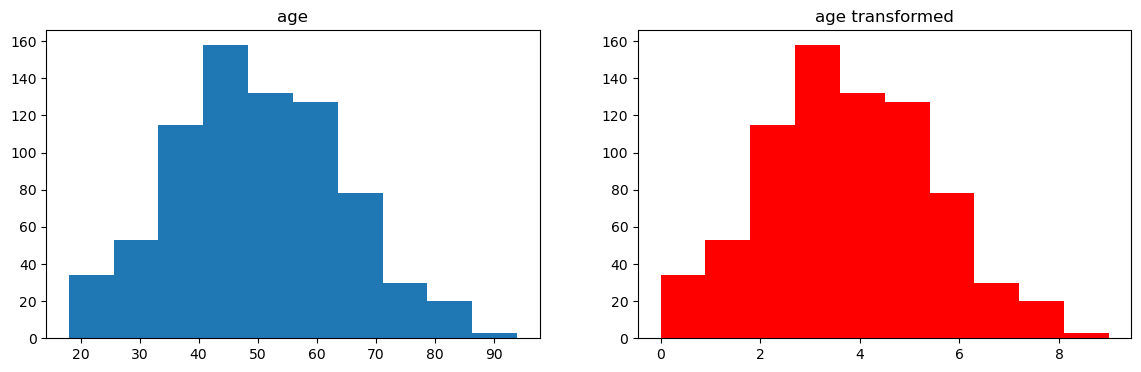

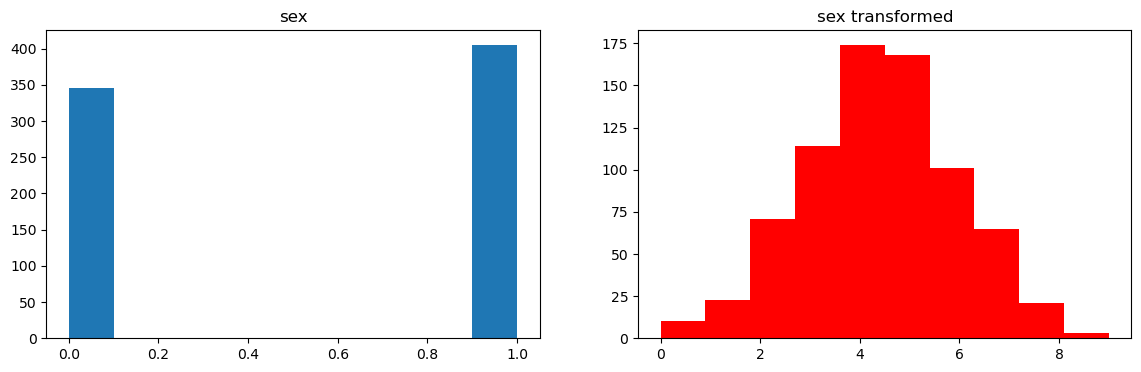

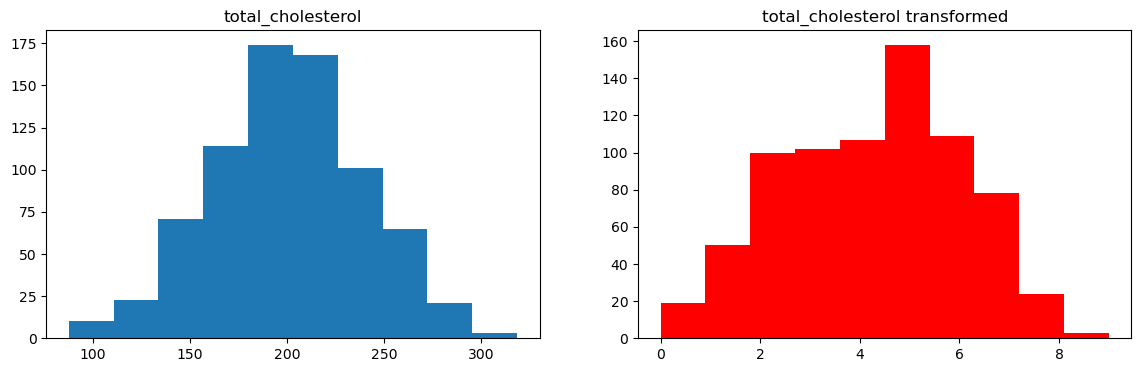

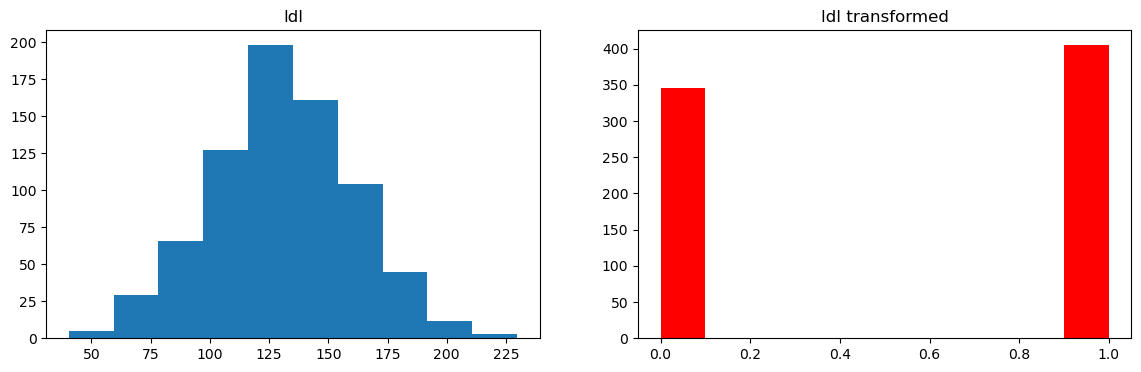

In [94]:
df=pd.read_csv("updated_version.csv",usecols=["age","sex","total_cholesterol","ldl","heart_attack"])
X=df.iloc[:,0:4]
Y=df.iloc[:,-1]
[X_train,X_test,Y_train,Y_test]=train_test_split(X,Y)
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_pred=tree.predict(X_test)
print("the accuracy is",accuracy_score(Y_pred,Y_test))
print(cross_val_score(tree,X_train,Y_train,cv=5,scoring="accuracy").mean())
def binning(bins, strategy1, strategy2):
    # Binning transformations
    bin1 = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy1)
    bin2 = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy2)
    
    # Apply transformations using ColumnTransformer
    tnf = ColumnTransformer(
        [("tnf1", bin1, [0, 2]), ("tnf2", bin2, [3])], remainder="passthrough"
    )
    
    # Transform the train and test data
    X_train_transformed = tnf.fit_transform(X_train)
    X_test_transformed = tnf.transform(X_test)
    
    # Convert the transformed data back to DataFrame and handle column names
    # Recreate column names manually based on transformations
    transformed_columns = ['age', 'sex','total_cholesterol', 'ldl']
    
    # Recreate DataFrames with proper column names
    X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)
    X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)
    
    # Train model with transformed data
    tree.fit(X_train_transformed, Y_train)
    Y_pred2 = tree.predict(X_test_transformed)
    
    # Print accuracy after transformation
    print("The accuracy after transformation is:", accuracy_score(Y_pred2, Y_test))
    print("Cross-validation accuracy after transformation:", cross_val_score(tree, X_train_transformed, Y_train, cv=5, scoring="accuracy").mean())
    print(tnf.named_transformers_["tnf1"].bin_edges_)
    output=pd.DataFrame({"age":X_train["age"],"sex":X_train["sex"],"total_cholesterol":X_train["total_cholesterol"],"ldl":X_train["ldl"],"age_tnf":X_train_transformed["age"],"total_cholesterol_tnf":X_train_transformed["total_cholesterol"],"ldl_tnf":X_train_transformed["ldl"]})
    output["age bin_edges"]=pd.cut(X_train["age"],bins=tnf.named_transformers_["tnf1"].bin_edges_[0].tolist())
    output["total_cholesterol bin_edges"]=pd.cut(X_train["total_cholesterol"],bins=tnf.named_transformers_["tnf1"].bin_edges_[0].tolist())
    output["ldl bin_edges"]=pd.cut(X_train["ldl"],bins=tnf.named_transformers_["tnf2"].bin_edges_[0].tolist())
    print(output)
    for col in X_train.columns:
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        plt.hist(X_train[col])
        plt.title(col)
        plt.subplot(122)
        plt.hist(X_train_transformed[col],color="red")
        plt.title(col+" "+"transformed")
# Call the binning function
binning(10, "uniform", "kmeans")